# Ex1: la chaleur latente de fusion de la glace

1. Lire les données

In [ ]:
# Importer les librairies
import numpy as np
import pandas as pd

In [ ]:
# Saisir les données
methode_A = np.array([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02])
methode_B = np.array([80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95, 79.97])

In [ ]:
# Créer un DataFrame avec une seule colonne et une étiquette pour la méthode
df = pd.DataFrame({
    'Chaleur_latente': np.concatenate([methode_A, methode_B]),
    'Méthode': ['A'] * len(methode_A) + ['B'] * len(methode_B)
})

# Afficher
df

,Chaleur_latente,Méthode
0,79.98,A
1,80.04,A
2,80.02,A
3,80.04,A
4,80.03,A
5,80.03,A
6,80.04,A
7,79.97,A
8,80.05,A
9,80.03,A


2. Comparer les distributions avec boxplot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

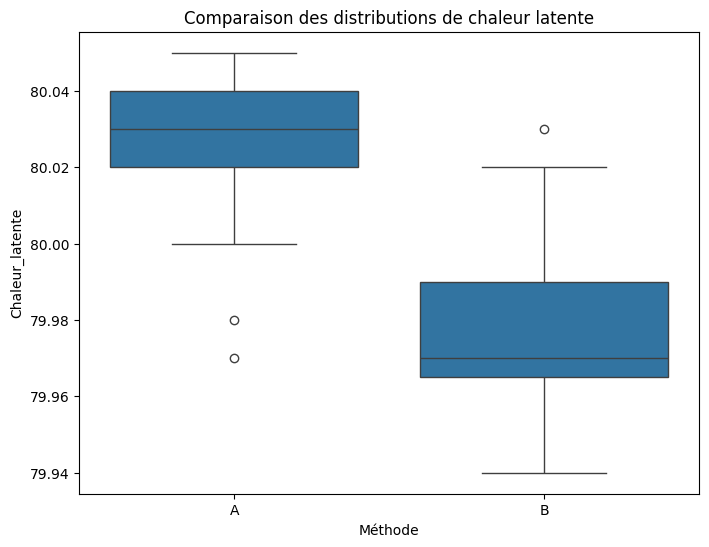

In [ ]:
# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Méthode', y='Chaleur_latente', data=df)
plt.title('Comparaison des distributions de chaleur latente')
plt.show()

**Conclusion**

Le boxplot compare la distribution de la chaleur latente pour les deux méthodes A et B.
On observe que :

* La médiane de la méthode A est plus élevée que celle de la méthode B, indiquant que, globalement, la méthode A produit des valeurs de chaleur latente plus grandes.

* La méthode A présente une variabilité légèrement plus faible autour de sa médiane par rapport à la méthode B, ce qui suggère que les mesures sont plus concentrées.

* Quelques valeurs aberrantes (outliers) sont visibles pour les deux méthodes, mais cela ne semble pas affecter significativement l’interprétation générale.

* La dispersion (l'étendue interquartile) est plus grande pour la méthode B, indiquant une plus grande variabilité des résultats.

En résumé, la méthode A semble offrir une chaleur latente plus élevée et plus stable que la méthode B.

3. Tester l’égalité des moyennes avec t-test

In [ ]:
from scipy import stats

In [ ]:
# Séparer les deux groupes
groupe_A = df[df['Méthode'] == 'A']['Chaleur_latente']
groupe_B = df[df['Méthode'] == 'B']['Chaleur_latente']

In [ ]:
# Test t de Student
t_stat, p_value = stats.ttest_ind(groupe_A, groupe_B, equal_var=False)  # On ne suppose pas l'égalité des variances ici
print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

t-statistic = 3.2499, p-value = 0.0069


**Explication :**

* t.test teste si la moyenne de A = la moyenne de B.

* Hypothèses :

 - H0 : μ_A = μ_B (mêmes moyennes)

 - H1 : μ_A ≠ μ_B (moyennes différentes)

**Conclusion :**

Si p-value < 0.05 ➔ on rejette H0 : il y a une différence significative entre les moyennes.

Sinon ➔ pas de différence détectée.

==> Dans notre cas, p-value = 0.0069 < 0.05 donc on rejette H0 et on accepte H1 ce qui signifie qu'il y a une différence siginficative entre les 2 moyennes.

4. Tester l’égalité des variances avec var.test

In [ ]:
# Test de variances (équivalent de var.test() en R : test de Levene ou test de Bartlett)
stat_var, p_var = stats.levene(groupe_A, groupe_B)
print(f"Levene test - stat = {stat_var:.4f}, p-value = {p_var:.4f}")

Levene test - stat = 0.2158, p-value = 0.6476


**Explication :**

* Le test de Levene vérifie si les variances des deux groupes sont égales.

* Hypothèses:

 - H0 : σ²_A = σ²_B (variances égales)

 - H1 : σ²_A ≠ σ²_B (variances différentes)

**Conclusion :

Si p-value < 0.05 ➔ variances différentes.

Sinon ➔ variances semblables.

==>Dans notre cas, p-value= 0.6476> 0.05 donc on rejette H1 et on accepte H0 ce qui signifie que les variances sont égales.

5. Appliquer un t-test classique qui suppose l’égalité des variances

In [ ]:
# t-test en supposant égalité des variances
t_stat_eqvar, p_value_eqvar = stats.ttest_ind(groupe_A, groupe_B, equal_var=True)
print(f"T-test avec égalité des variances : t-statistic = {t_stat_eqvar:.4f}, p-value = {p_value_eqvar:.4f}")

T-test avec égalité des variances : t-statistic = 3.4722, p-value = 0.0026


**Explication :**

* Ici on force equal_var=True ➔ test de Student classique.

* C’est utile seulement si les variances sont jugées égales d’après le test précédent. **(ce qui est le cas)**



----------------------------------------
* **t-statistic:** La valeur du test de Student.

 Plus cette valeur est élevée (en valeur absolue), plus il y a une différence importante entre les moyennes des deux groupes.

==> Dans notre cas, 3.4722 est assez grand, ce qui suggère une différence significative entre les deux méthodes.

* **p-value:**La probabilité d'observer une différence au moins aussi grande que celle mesurée si les moyennes des deux groupes étaient en réalité égales(hypothèse nulle 𝐻0).

 Un seuil classique de décision est 𝛼=0.05 :

 - Si p-value < 0.05, on rejette l'hypothèse nulle H0 .

 - Si p-value > 0.05, on ne rejette pas 𝐻0 .

==>Dans notre cas 0.0026 < 0.05, donc : On rejette l'hypothèse nulle :
Il y a une différence significative entre les moyennes des deux méthodes.

Autrement dit, les méthodes A et B ne donnent pas la même chaleur latente en moyenne.



6. Test de Wilcoxon (test non paramétrique)

In [ ]:
# Test de Wilcoxon-Mann-Whitney
u_stat, p_wilcoxon = stats.mannwhitneyu(groupe_A, groupe_B, alternative='two-sided')
print(f"Wilcoxon-Mann-Whitney test : U-statistic = {u_stat:.4f}, p-value = {p_wilcoxon:.4f}")

Wilcoxon-Mann-Whitney test : U-statistic = 89.0000, p-value = 0.0075


**Explication :**

* mannwhitneyu est utilisé quand on ne peut pas supposer la normalité.

* Hypothèses :

 - H0 : Les deux groupes viennent de la même distribution.

 - H1 : Distribution différente.

* C’est un test non paramétrique (pas besoin de normalité).

**Conclusion :**

Si p-value < 0.05 ➔ les distributions sont différentes.

==>Dans notre cas p-value=0.0075 < 0.05 donc les distributions sont différentes.

7. Tester la normalité avec qqplot et Shapiro/Kolmogorov

In [ ]:
import statsmodels.api as sm

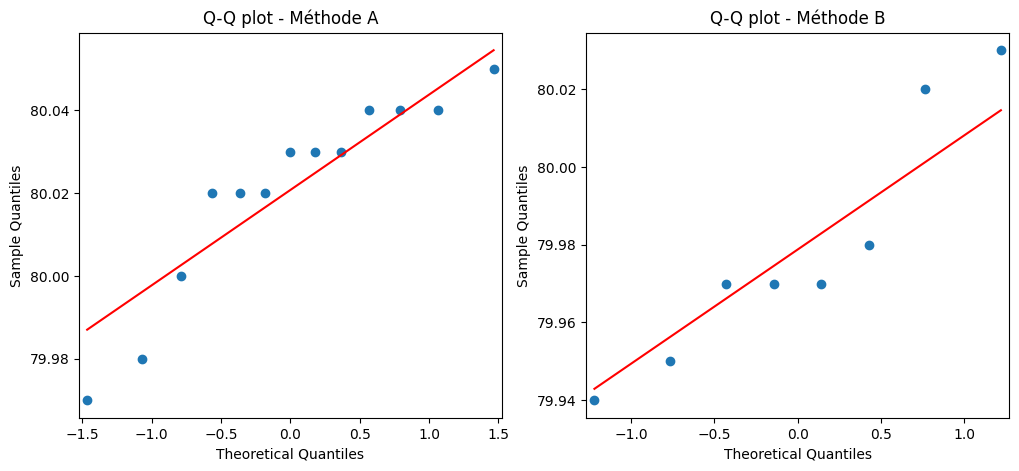

In [ ]:
# Q-Q plots ->  vérifier visuellement si les points suivent la diagonale (normalité)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sm.qqplot(groupe_A, line='s', ax=plt.gca())
plt.title('Q-Q plot - Méthode A')

plt.subplot(1,2,2)
sm.qqplot(groupe_B, line='s', ax=plt.gca())
plt.title('Q-Q plot - Méthode B')

plt.show()

**Interpretation**
* Méthode A (à gauche) :
 - Les points suivent globalement la droite rouge (droite théorique de la loi normale).

 - Il y a de légères déviations aux extrémités (aux valeurs les plus petites et les plus grandes).

=> Les données de la méthode A sont assez proches d'une distribution normale, même si quelques légères déviations sont visibles.

* Méthode B (à droite) :
 - Les points suivent également assez bien la droite rouge, mais avec quelques écarts plus visibles notamment pour les valeurs extrêmes.

=> Les données de la méthode B semblent normales mais présentent des écarts légèrement plus marqués par rapport à la loi normale que la méthode A.

In [ ]:
# Test de Shapiro-Wilk -> test statistique de normalité.
shapiro_A = stats.shapiro(groupe_A)
shapiro_B = stats.shapiro(groupe_B)
print(f"Shapiro-Wilk Méthode A : p-value = {shapiro_A.pvalue:.4f}")
print(f"Shapiro-Wilk Méthode B : p-value = {shapiro_B.pvalue:.4f}")

Shapiro-Wilk Méthode A : p-value = 0.0553
Shapiro-Wilk Méthode B : p-value = 0.2403


* Si p-value < 0.05 ➔ la normalité est rejetée.

* Sinon ➔ normalité plausible.

=>Dans notre cas,
* Pour la méthode A: p-value= 0.0553 > 0.05 donc la normalité est plausible
* Pour la méthode B: p-value= 0.2403 > 0.05 donc la normalité est plausible


In [ ]:
# Test de Kolmogorov-Smirnov (par rapport à une loi normale) -> test statistique de normalité.
ks_A = stats.kstest((groupe_A - groupe_A.mean())/groupe_A.std(ddof=1), 'norm')
ks_B = stats.kstest((groupe_B - groupe_B.mean())/groupe_B.std(ddof=1), 'norm')
print(f"Kolmogorov-Smirnov Méthode A : p-value = {ks_A.pvalue:.4f}")
print(f"Kolmogorov-Smirnov Méthode B : p-value = {ks_B.pvalue:.4f}")

Kolmogorov-Smirnov Méthode A : p-value = 0.3050
Kolmogorov-Smirnov Méthode B : p-value = 0.6870


* Si p-value < 0.05 ➔ la normalité est rejetée.

* Sinon ➔ normalité plausible.

=>Dans notre cas,
* Pour la méthode A: p-value= 0.305 > 0.05 donc la normalité est plausible
* Pour la méthode B: p-value= 0.687 > 0.05 donc la normalité est plausible


# Etude d’un sc ́enario complet:  ́etude de la con-centration en ozone

## Exploration statistique  ́elementaire

1. Lire les données

In [ ]:
# Charger le fichier
df = pd.read_csv('ozone (1).csv', sep=';', encoding='latin1')

# Supprimer la variable inutile 'obs' si elle existe
if 'obs' in df.columns:
    df = df.drop(columns=['obs'])

# Afficher un aperçu des données
df.head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,87,"15,6","18,5","18,4",4,4,8,"0,6946","-1,7101","-0,6946",84,Nord,Sec
1,82,17,"18,4","17,7",5,5,7,"-4,3301",-4,-3,87,Nord,Sec
2,92,"15,3","17,6","19,5",2,5,4,"2,9544","1,8794","0,5209",82,Est,Sec
3,114,"16,2","19,7","22,5",1,1,0,"0,9848","0,3473","-0,1736",92,Nord,Sec
4,94,"17,4","20,5","20,4",8,8,7,"-0,5","-2,9544","-4,3301",114,Ouest,Sec


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   maxO3   112 non-null    int64 
 1   T9      112 non-null    object
 2   T12     112 non-null    object
 3   T15     112 non-null    object
 4   Ne9     112 non-null    int64 
 5   Ne12    112 non-null    int64 
 6   Ne15    112 non-null    int64 
 7   Vx9     112 non-null    object
 8   Vx12    112 non-null    object
 9   Vx15    112 non-null    object
 10  maxO3v  112 non-null    int64 
 11  vent    112 non-null    object
 12  pluie   112 non-null    object
dtypes: int64(5), object(8)
memory usage: 11.5+ KB
None


In [ ]:
df.describe()

,maxO3,Ne9,Ne12,Ne15,maxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,90.303571,4.928571,5.017857,4.830357,90.571429
std,28.187225,2.594916,2.281860,2.332259,28.276853
min,42.000000,0.000000,0.000000,0.000000,42.000000
25%,70.750000,3.000000,4.000000,3.000000,71.000000
50%,81.500000,6.000000,5.000000,5.000000,82.500000
75%,106.000000,7.000000,7.000000,7.000000,106.000000
max,166.000000,8.000000,8.000000,8.000000,166.000000


In [ ]:
for col in cols_to_float:
    df[col] = df[col].astype(str).str.replace(',', '.').str.replace(r'[^\d\.\-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Convertir les colonnes qui sont mal typées
cols_to_float = ['T9', 'T12', 'T15', 'Vx9', 'Vx12', 'Vx15']
for col in cols_to_float:
    df[col] = df[col].astype(str).str.replace(',', '.').str.replace(r'[^\d\.\-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[cols_to_float] = df[cols_to_float].apply(pd.to_numeric, errors='coerce')

# Vérifier
print(df.dtypes)

maxO3       int64
T9        float64
T12       float64
T15       float64
Ne9         int64
Ne12        int64
Ne15        int64
Vx9       float64
Vx12      float64
Vx15      float64
maxO3v      int64
vent       object
pluie      object
dtype: object


In [ ]:
df

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec
108,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie
109,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec
110,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie


2. Description unidimensionnelle

maxO3     90.303571
maxO3v    90.571429
T9        18.360714
T12       21.526786
T15       22.627679
Ne9        4.928571
Ne12       5.017857
Ne15       4.830357
Vx9       -1.214346
Vx12      -1.611004
Vx15      -1.690683
dtype: float64
maxO3     28.187225
maxO3v    28.276853
T9         3.122726
T12        4.042321
T15        4.530859
Ne9        2.594916
Ne12       2.281860
Ne15       2.332259
Vx9        2.632742
Vx12       2.795673
Vx15       2.810198
dtype: float64


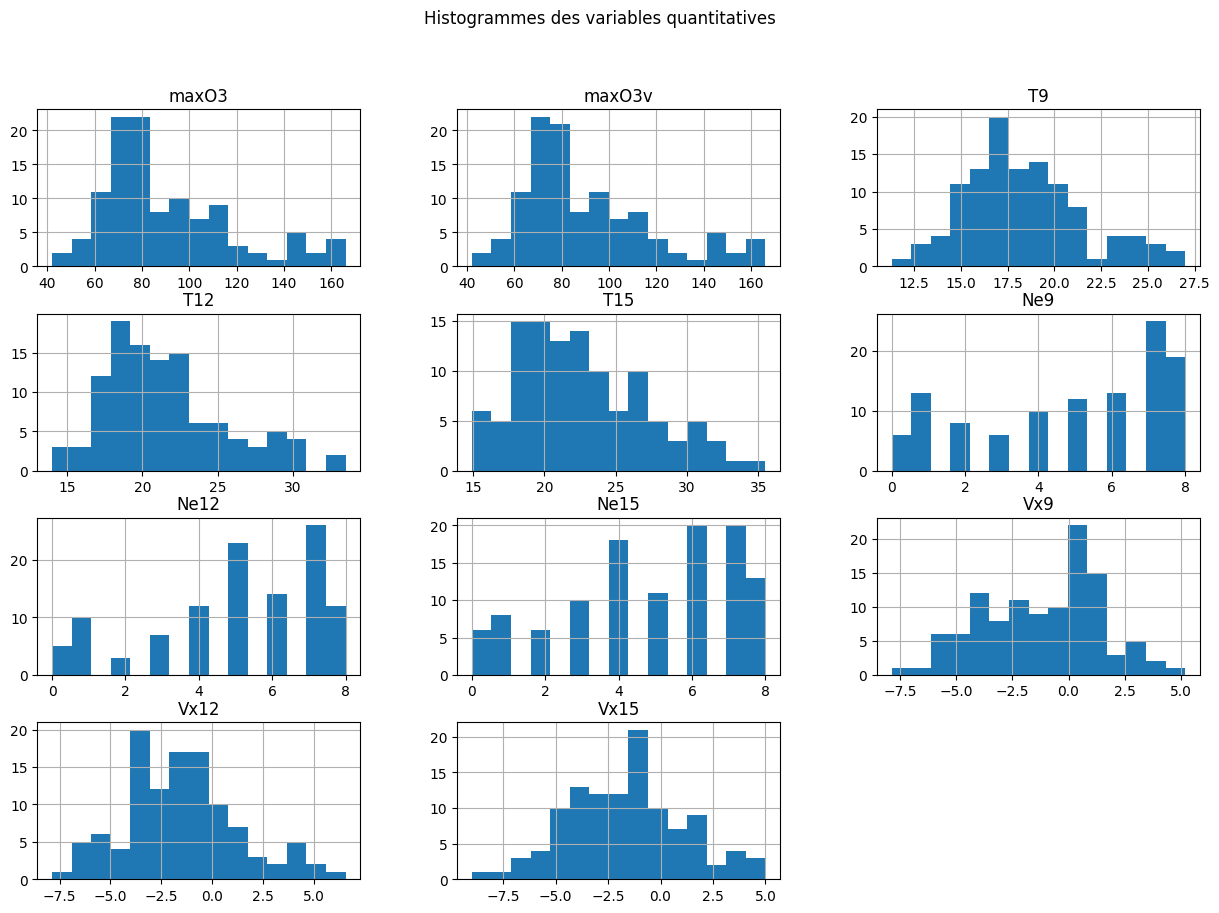

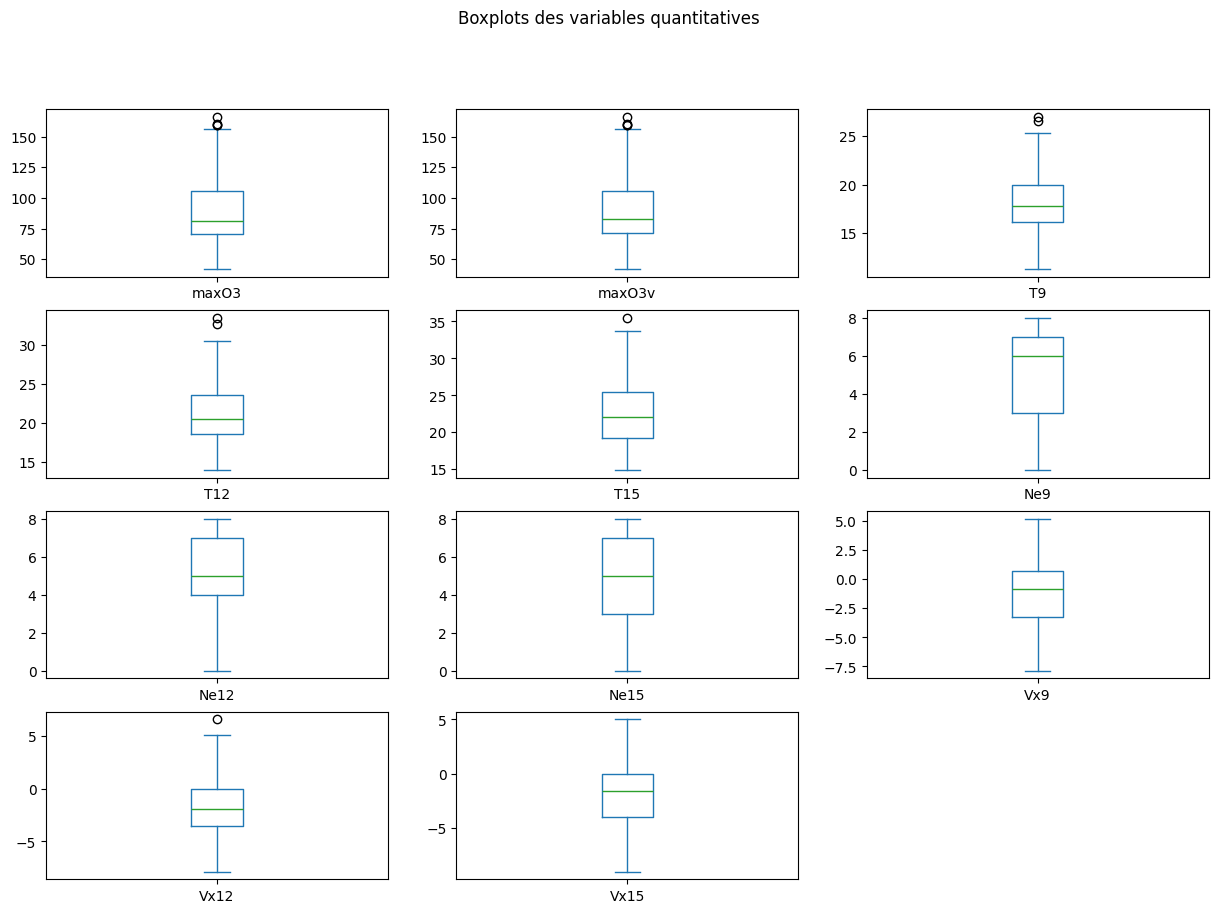

In [ ]:
# Liste des variables quantitatives
quantitative_vars = ['maxO3', 'maxO3v', 'T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15']

# Moyenne et écart-type
print(df[quantitative_vars].mean())
print(df[quantitative_vars].std())

# Histograms
df[quantitative_vars].hist(figsize=(15, 10), bins=15)
plt.suptitle('Histogrammes des variables quantitatives')
plt.show()

# Boxplots
df[quantitative_vars].plot(kind='box', subplots=True, layout=(4,3), figsize=(15,10), sharex=False, sharey=False)
plt.suptitle('Boxplots des variables quantitatives')
plt.show()


vent
Ouest    50
Nord     31
Sud      21
Est      10
Name: count, dtype: int64
pluie
Sec      69
Pluie    43
Name: count, dtype: int64


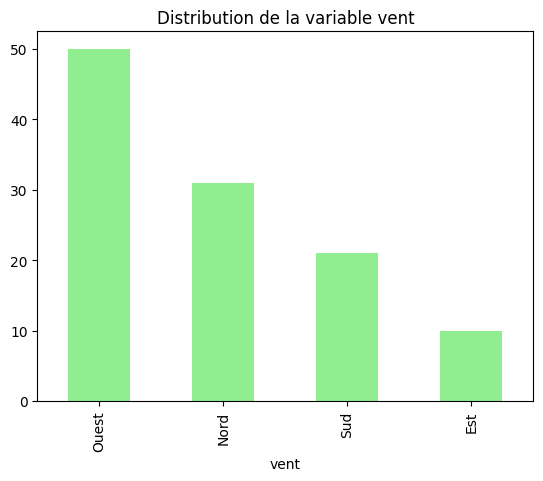

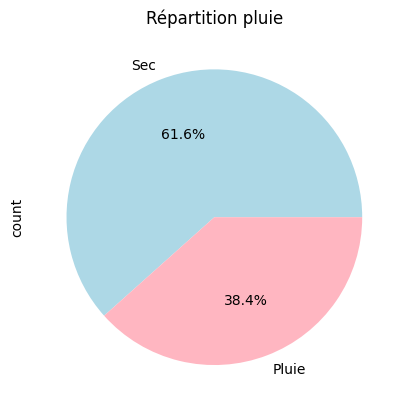

In [ ]:
#variables qualitatives

# Fréquences
print(df['vent'].value_counts())
print(df['pluie'].value_counts())

# Barplots
df['vent'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution de la variable vent')
plt.show()

df['pluie'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Répartition pluie')
plt.show()


3.  Description bidimensionnelle


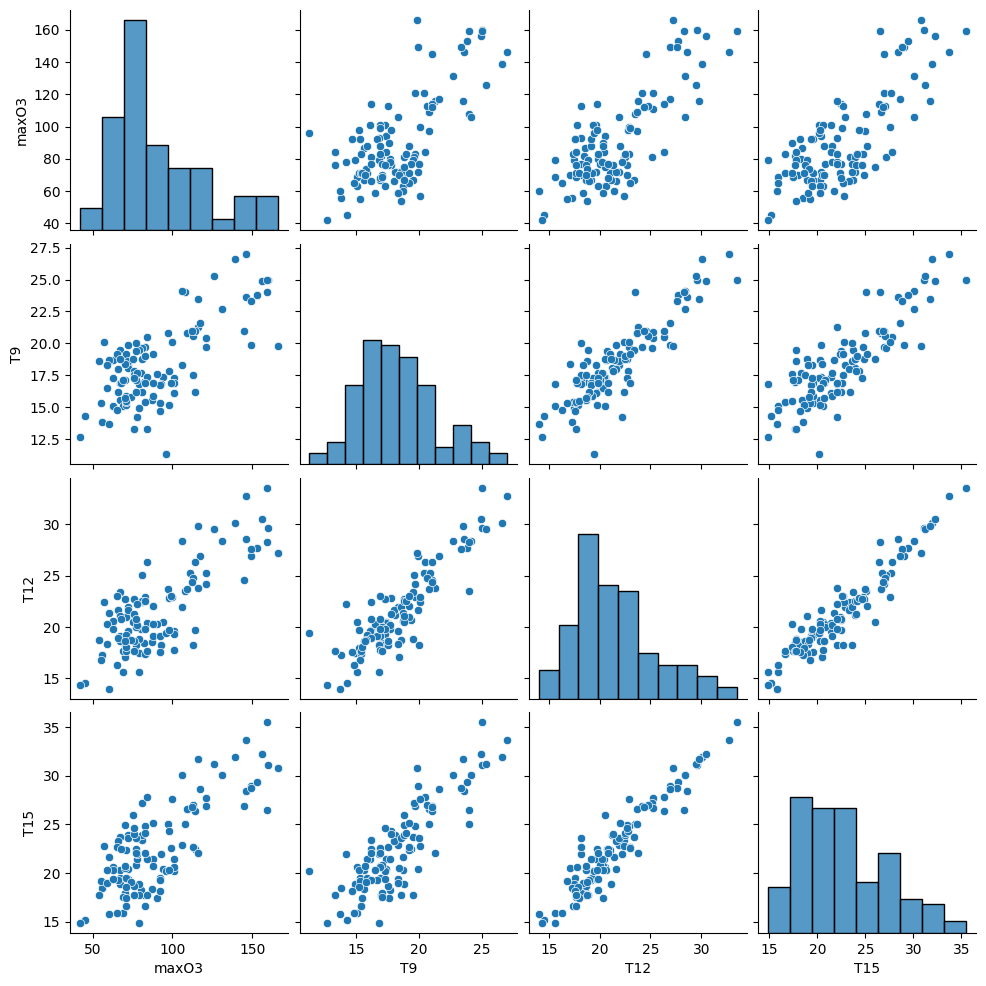

In [ ]:
#Variables qualitatives entre elles

# Matrice de scatter plots
sns.pairplot(df[['maxO3', 'T9', 'T12', 'T15']])
plt.show()


==> maax03 semble positivement corrolée avec T15, T12 et T9

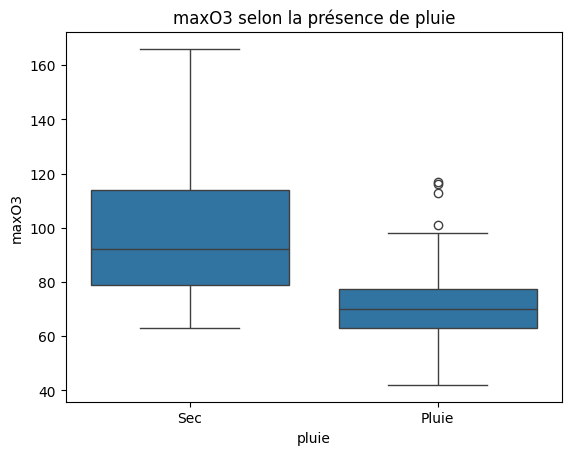

In [ ]:
# Quantitatives vs Qualitatives

# Boxplot de maxO3 en fonction de la pluie
sns.boxplot(x='pluie', y='maxO3', data=df)
plt.title('maxO3 selon la présence de pluie')
plt.show()

==> Lorsqu'il pleut, les niveaux de maxO3 sont plus faibles.

pluie  Pluie  Sec
vent             
Est        2    8
Nord      10   21
Ouest     26   24
Sud        5   16


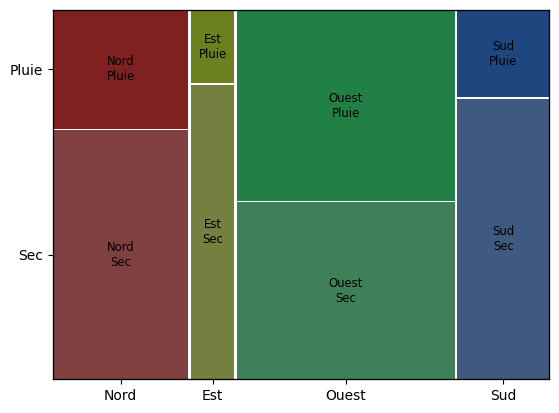

In [ ]:
#Variables qualitatives entre elles

# Table de contingence
contingency_table = pd.crosstab(df['vent'], df['pluie'])
print(contingency_table)

# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['vent', 'pluie'])
plt.show()

## Tests de comparaisons

1. Vérification de la normalité (Gaussanité)

Normalit ́e d’une distribution : Shapiro-Wilks

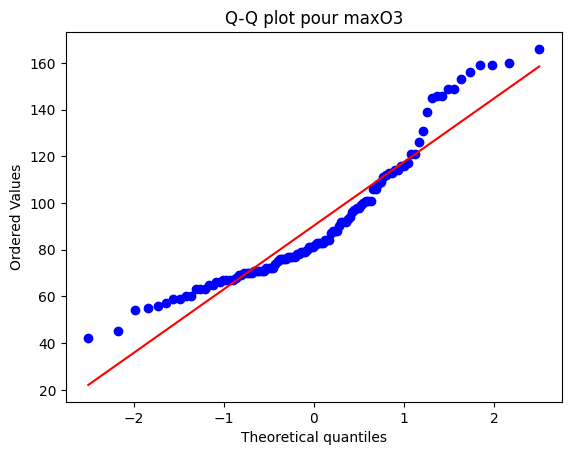

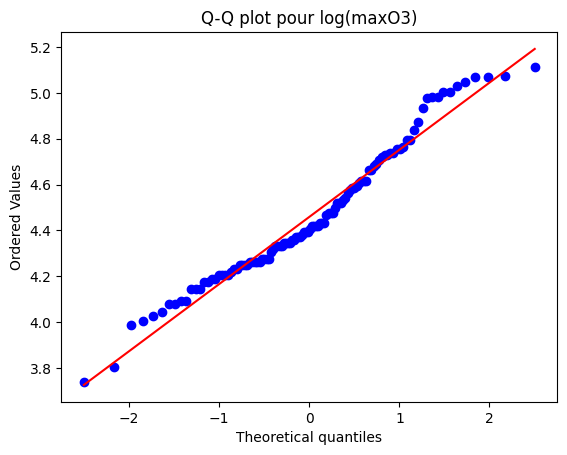

In [ ]:
import scipy.stats as stats

# Q-Q plot pour maxO3
stats.probplot(df['maxO3'], dist="norm", plot=plt)
plt.title('Q-Q plot pour maxO3')
plt.show()

# Q-Q plot pour log(maxO3)
import numpy as np
df['LmaxO3'] = np.log(df['maxO3'])
stats.probplot(df['LmaxO3'], dist="norm", plot=plt)
plt.title('Q-Q plot pour log(maxO3)')
plt.show()

**Interpretation**
* maxO3 n'est pas très aligné sur la droite -> pas normal.

* log(maxO3) est mieux aligné ➔ log-normalité probable.



In [ ]:
# Test de normalité sur maxO3 (Tests de Shapiro-Wilk)
shapiro_stat, shapiro_p = stats.shapiro(df['maxO3'])
print(f"Shapiro maxO3 : p-value = {shapiro_p}")

# Test de normalité sur log(maxO3)
shapiro_log_stat, shapiro_log_p = stats.shapiro(df['LmaxO3'])
print(f"Shapiro log(maxO3) : p-value = {shapiro_log_p}")


Shapiro maxO3 : p-value = 8.515522723445678e-07
Shapiro log(maxO3) : p-value = 0.00950853591998888


- **Question posée :** maxO3 suit-il une loi normale ?

- **H0:**  maxO3 suit une loi normale.

- Si p-value < 0.05, on rejette l'hypothèse nulle H0 sinon on accepte H0

==>Dans notre cas:
* p-valeur pour maxO3< 0.05 ➔ on rejette H0 ➔ pas normale.

* p-valeur pour log(maxO3) < 0.05 ➔ on rejette H0 ➔ pas normale.

Intervalle de confiance d’une moyenne : Student

In [ ]:
import scipy.stats as stats

# Calcul de l'intervalle de confiance sur log(maxO3)
mean = np.mean(df['LmaxO3'])
sem = stats.sem(df['LmaxO3'])  # erreur standard
conf_interval = stats.t.interval(confidence=0.95, df=len(df['LmaxO3'])-1, loc=mean, scale=sem)
print(f"Intervalle de confiance à 95% de la moyenne de log(maxO3) : {conf_interval}")


Intervalle de confiance à 95% de la moyenne de log(maxO3) : (np.float64(4.404272010940863), np.float64(4.514038723667802))


**Explication :**

* On estime l'intervalle de confiance à 95% pour la moyenne de log(maxO3).

* Le test utilise la loi de Student car on travaille sur une moyenne et l’échantillon n'est pas infini.


**Conclusion :**

Si une valeur théorique (par ex 0) n'est pas dans l'intervalle, on peut dire que la moyenne de log(maxO3) est significativement différente de 0 à 95% de confiance.

Comparaison de deux variances : Fisher

In [ ]:
# Supposons que 'pluie' contient "Pluie" et "Sec"
groupe_pluie = df[df['pluie'] == "Pluie"]['LmaxO3']
groupe_sec = df[df['pluie'] == "Sec"]['LmaxO3']

# Test de normalité pour chaque groupe
print(stats.shapiro(groupe_pluie))
print(stats.shapiro(groupe_sec))

# Test de Fisher (test de variance)
var_stat, var_pvalue = stats.levene(groupe_pluie, groupe_sec)
print(f"Test de Fisher-Levene : p-value = {var_pvalue}")

ShapiroResult(statistic=np.float64(0.9676804967710378), pvalue=np.float64(0.2624586134233936))
ShapiroResult(statistic=np.float64(0.9413081970818581), pvalue=np.float64(0.0028418607027608095))
Test de Fisher-Levene : p-value = 0.05670176216360521


**Explication :**

* On vérifie si les deux échantillons (Pluie et Sec) suivent une distribution normale (Shapiro-Wilk),

* Puis on teste l'égalité des variances avec le test de Levene (équivalent moderne du Fisher).

**Conclusion :**

* Si p-value > 0.05, on considère que les variances sont égales.

* Si p-value < 0.05, on considère que les variances sont différentes.

==>Dans notre cas, p-value = 0.05670> 0.05 donc on cosidére que les variances sont égales.

Comparaison de deux moyennes

En fonction du résultat précédent :

* Si variances égales → Test de Student. **(c'est notre cas)**

* Si variances différentes → Test de Welch.

In [ ]:
t_stat_eq, t_pvalue_eq = stats.ttest_ind(groupe_pluie, groupe_sec, equal_var=True)
print(f"Test de Student : p-value = {t_pvalue_eq}")

Test de Student : p-value = 9.363817936659623e-09


**Explication**

* On compare les moyennes de LmaxO3 entre jours de pluie et jours secs.

**Conclusion :**

* Si p-value < 0.05, les moyennes sont significativement différentes.

* Sinon, on ne rejette pas l'hypothèse d'égalité.

==> Dans notre cas, p-value< 0.05 donc les moyennes sont significativement différentes.

Comparaison appariée

In [ ]:
# Test apparié pour comparer la concentration entre jour et veille
t_stat_paired, t_pvalue_paired = stats.ttest_rel(df['maxO3'], df['maxO3v'])
print(f"Test apparié : p-value = {t_pvalue_paired}")

Test apparié : p-value = 0.899640225603541


**Explication :**

* T-test apparié car c'est la même station de mesure entre deux jours consécutifs (pas deux échantillons indépendants).

**Conclusion :**

* Si p-value < 0.05, il y a une différence significative entre les mesures du jour et de la veille.

==>Dans notre cas, p-value = 0.89> 0.05 donc on suggéré qu'il n'ya pas une différence significative entre  les mesures du jour et de la veille.

2. Cas non-paramétrique

Échantillons indépendants : pluie vs sec

In [ ]:
# Médians par groupe
print(df.groupby('pluie')['LmaxO3'].median())

# Test de Wilcoxon pour deux échantillons indépendants
u_stat, u_pvalue = stats.mannwhitneyu(groupe_pluie, groupe_sec, alternative='two-sided')
print(f"Test de Mann-Whitney (Wilcoxon pour indép.) : p-value = {u_pvalue}")

pluie
Pluie    4.248495
Sec      4.521789
Name: LmaxO3, dtype: float64
Test de Mann-Whitney (Wilcoxon pour indép.) : p-value = 2.1655474893487053e-08


**Explication :**

* On teste s’il existe une différence significative entre les médianes de LmaxO3 entre pluie et sec.

**Conclusion :**

* Si p-value < 0.05, les médianes sont significativement différentes.

==> Dans notre cas, p-value< 0.05 donc les  médianes sont significativement différentes.

Échantillons appariés : jour vs veille
Code :

In [ ]:
df['LmaxO3v'] = np.log(df['maxO3v'])

# Médiane des différences
median_diff = np.median(df['LmaxO3'] - df['LmaxO3v'])
print(f"Médiane des différences : {median_diff}")

# Test de Wilcoxon apparié
w_stat, w_pvalue = stats.wilcoxon(df['LmaxO3'], df['LmaxO3v'])
print(f"Test de Wilcoxon apparié : p-value = {w_pvalue}")

Médiane des différences : 0.010309643601368101
Test de Wilcoxon apparié : p-value = 0.9577628487744089


**Explication :**

* Test si la médiane des différences entre les mesures jour/veille est significativement différente de 0.

**Conclusion :**

* Si p-value < 0.05, il y a une différence significative entre les mesures.

==> Dans notre cas , p-value = 0.957 > 0.05 donc il n'y a pas une différence significative entre les mesures

## Tests de liaison

1. Test du khi² pour l’indépendance entre deux variables qualitatives (pluie et vent)

In [ ]:
from scipy.stats import chi2_contingency

# Table de contingence
contingency_table = pd.crosstab(df['pluie'], df['vent'])

# Test du chi²
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Test du chi² :")
print(f"Statistique = {chi2_stat:.4f}, p-value = {p_val:.4f}, ddl = {dof}")
print("Table des effectifs théoriques :")
print(expected)

Test du chi² :
Statistique = 7.7258, p-value = 0.0520, ddl = 3
Table des effectifs théoriques :
[[ 3.83928571 11.90178571 19.19642857  8.0625    ]
 [ 6.16071429 19.09821429 30.80357143 12.9375    ]]


* **chi2_stat**(	Statistique du test χ²) : mesure l’écart entre les effectifs observés et les effectifs théoriques.

 - χ2 = ∑ [​(Oij - Eij)2 /Eij ]   où O = effectifs observés, E = effectifs théoriques.

 Plus elle est grande, plus il y a de chances que les deux variables soient dépendantes.
* **p_value** (associée au test χ²) : probabilité d’obtenir un tel écart par hasard si les deux variables étaient indépendantes.
 - Si p-value < 0.05 alors il y a dépendance significative entre pluie et vent.

 - Sinon, on considère que les deux variables sont indépendantes.

* dof(ddl):	Degrés de liberté (ddl)

==> Dans notre cas, p-value = 0.0520> 0.05 (c'est juste au dessus-du seuil) donc on ne peut pas rejeter fermement l’hypothèse d’indépendance, mais c’est limite : il pourrait y avoir un lien faible entre les deux variables.



2. ANOVA : influence d’une variable qualitative (vent) sur une quantitative (LmaxO3)

On va tester si la moyenne de LmaxO3 varie significativement selon les modalités de la variable vent.

**Conditions à vérifier :**
* Indépendance des échantillons (supposée ici).

* Normalité des résidus du modèle.

* Égalité des variances entre groupes (test de Bartlett).

In [ ]:
from scipy.stats import bartlett

# Test de Bartlett
grouped_data = [df[df['vent'] == val]['LmaxO3'].dropna() for val in df['vent'].unique()]
bart_stat, bart_pval = bartlett(*grouped_data)
print(f"Test de Bartlett : p-value = {bart_pval}")

Test de Bartlett : p-value = 0.9072411986448219


Si p-value < 0.05, variances différentes ⇒ ANOVA pas valide directement.

==>Dans notre cas, p-value = 0.9> 0.05 donc on accepte l'ypothese nulle càd Les variances de LmaxO3 sont homogènes entre les différents types de vent et par conséquent ANOVA est valide maintenant.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA à un facteur
anova_model = ols('LmaxO3 ~ C(vent)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

            sum_sq     df         F    PR(>F)
C(vent)   0.858769    3.0  3.562505  0.016649
Residual  8.678080  108.0       NaN       NaN


* F = 3.56 : C’est la statistique de test F.

* p-value = 0.0166 : Elle est inférieure à 0.05, ce qui signifie qu'il existe une différence significative des moyennes de LmaxO3 entre au moins deux catégories de vent.

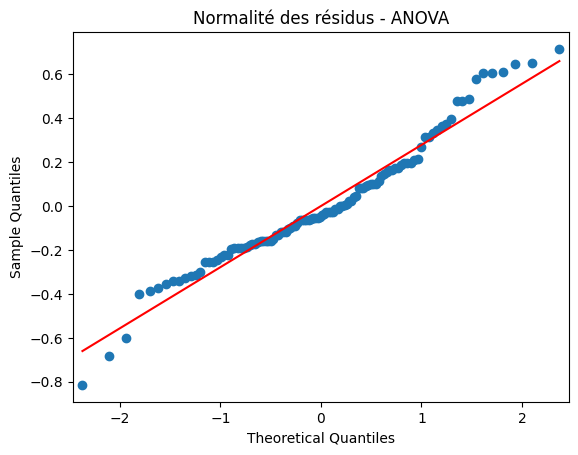

Test de Shapiro sur les résidus : p-value = 0.006519710677458042


In [ ]:
# Q-Q plot des résidus
sm.qqplot(anova_model.resid, line='s')
plt.title('Normalité des résidus - ANOVA')
plt.show()

# Test de Shapiro sur les résidus
shapiro_stat, shapiro_p = stats.shapiro(anova_model.resid)
print(f"Test de Shapiro sur les résidus : p-value = {shapiro_p}")

**Interprétation**

**Q-Q plot**

L’image montre un Q-Q plot des résidus de l’ANOVA. On voit que les points suivent (presque) globalement la ligne rouge, sauf pour les extrémités.

=>Cela suggère une quasi-normalité, mais avec quelques écarts sur les queues (valeurs extrêmes un peu déviantes).

**Test de Shapiro-Wilk**

p-value < 0.05, donc on rejette l’hypothèse de normalité des résidus.

=>Cela contredit légèrement le Q-Q plot, mais cela peut arriver si le test est sensible aux valeurs extrêmes.


3. Cas non paramétrique : Test de Kruskal-Wallis

Alternative à l’ANOVA si les conditions de normalité ou d’homoscédasticité ne sont pas respectées.

In [ ]:
kruskal_stat, kruskal_p = stats.kruskal(*grouped_data)
print(f"Test de Kruskal-Wallis : p-value = {kruskal_p}")

Test de Kruskal-Wallis : p-value = 0.0034306344588190744


Si p < 0.05, il y a une différence significative entre les groupes (selon vent), même sans hypothèses fortes.

==> Dans notre cas, Le test de Kruskal-Wallis donne une p-value = 0.003, donc même sans normalité, on confirme que la direction du vent a un effet significatif sur maxO3

4. Régression linéaire simple : prédire LmaxO3 en fonction de LmaxO3v

Tester si la concentration de la veille (LmaxO3v) permet de prédire celle du jour (LmaxO3).

In [ ]:
# Modèle de régression
reg_model = ols('LmaxO3 ~ LmaxO3v', data=df).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 LmaxO3   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     90.98
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           4.48e-16
Time:                        13:47:44   Log-Likelihood:                 12.777
No. Observations:                 112   AIC:                            -21.55
Df Residuals:                     110   BIC:                            -16.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4686      0.314      4.674      0.0

**Significativité du modèle**
* **Résumé du modèle :**
 - R² = 0.453 → 45.3% de la variabilité de LmaxO3 est expliquée par LmaxO3v (valeur de la veille).

 - F-statistic = 90.98, p-value < 0.0001 → le modèle est hautement significatif.

 - Coefficient de LmaxO3v = 0.6702, avec p < 0.0001 → l’effet de LmaxO3v est significatif.

* **Interprétation**

 Le modèle est globalement significatif, et la variable explicative LmaxO3v (ozone max de la veille) a une influence forte et positive sur LmaxO3. Chaque unité supplémentaire de LmaxO3v augmente LmaxO3 de 0.67 unités en moyenne.

**Qualité de l’ajustement**
* R² = 0.453 : Ce n’est pas exceptionnel, mais acceptable pour des données environnementales.

* Le modèle n’explique pas toute la variance : il reste près de 55% d’information non expliquée.

**Conclusion :**

L’ajustement est modéré. Le modèle peut être utile pour la tendance générale, mais pas suffisant pour une prévision précise.

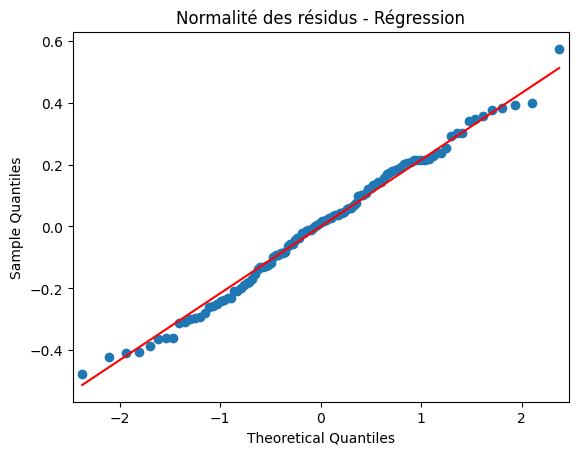

Shapiro des résidus : p-value = 0.5621695387278645


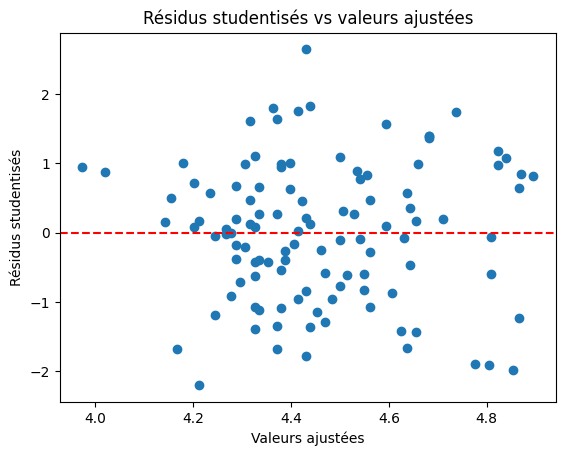

In [ ]:
#Analyse des résidus
# Q-Q plot des résidus
sm.qqplot(reg_model.resid, line='s')
plt.title("Normalité des résidus - Régression")
plt.show()

# Test de normalité des résidus
shapiro_resid_stat, shapiro_resid_p = stats.shapiro(reg_model.resid)
print(f"Shapiro des résidus : p-value = {shapiro_resid_p}")

# Graphique des résidus standardisés
res_student = reg_model.get_influence().resid_studentized_internal
plt.scatter(reg_model.fittedvalues, res_student)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Résidus studentisés vs valeurs ajustées')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus studentisés')
plt.show()

**Normalité des résidus**
* Q-Q plot : Les points suivent bien la droite → les résidus semblent normaux.

* Shapiro p-value = 0.562 > 0.05 → on ne rejette pas l’hypothèse de normalité.

=> Les résidus sont normalement distribués, une des hypothèses fondamentales de la régression est respectée.

**Graphique des résidus studentisés vs valeurs ajustées**
* Le nuage de points est aléatoire autour de zéro, sans structure visible.

* Il n’y a pas de tendance apparente ni d’hétéroscédasticité marquée.

=> Les résidus semblent homoscédastiques (variance constante) et indépendants.

## ACP et regression multiple


1. ACP sur les variables quantitatives

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

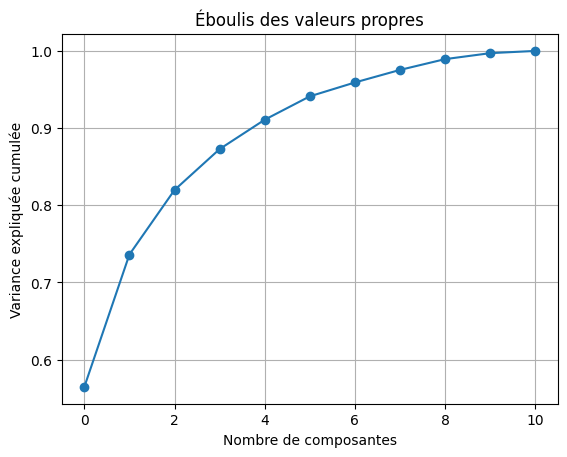

Part de variance expliquée par les axes : [0.56450143 0.17160361 0.08362105 0.0530207  0.03806744 0.03031201
 0.01797566 0.01626768 0.01398793 0.00773691 0.00290558]


In [ ]:
# Données uniquement quantitatives

quant_vars = ['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15', 'maxO3v', 'maxO3']
X = df[quant_vars]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP
pca = PCA()
res_pca = pca.fit(X_scaled)

# Éboulis des valeurs propres
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Éboulis des valeurs propres")
plt.grid(True)
plt.show()

# Résumé
explained_var = pca.explained_variance_ratio_
print("Part de variance expliquée par les axes :", explained_var)


Le graphe montre la variance expliquée cumulée par les composantes principales (PCs = Principal Components).

L’objectif est de voir combien de composantes suffisent pour expliquer une grande partie de la variance totale du jeu de données.

**Ce que l’on observe :**
* La 1ère composante (PC1) explique ~56.5% de la variance.

* Avec la 2ème (PC2), on atteint ~73.7%.

* La 3ème (PC3) pousse ce total à ~82.1%.

* Avec 4 composantes, on atteint déjà ~87.4%.

* Et avec 5 composantes, on dépasse 91% de la variance expliquée.

==>Une règle courante est de choisir un nombre de composantes qui permet d’expliquer au moins 90% de la variance, sans garder trop de dimensions.

Dans notre cas, 5 composantes suffisent pour capturer plus de 91% de l’information initiale. C’est un bon compromis entre réduction de dimension et perte d’information minimale.

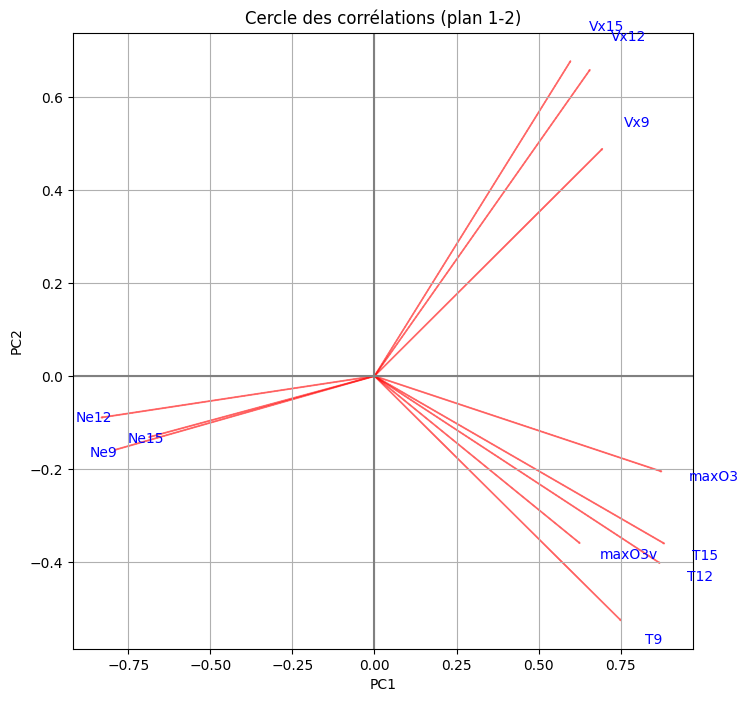

In [ ]:
# Cercle des corrélations
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8, 8))
for i, var in enumerate(quant_vars):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var, color='b')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle des corrélations (plan 1-2)")
plt.grid()
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.show()

**Variables associées à PC1 (axe horizontal) :**

* Ces variables sont situées à droite : T9, T12, T15, maxO3, maxO3v, Vx9, Vx12, Vx15 → toutes pointent vers la droite, donc corrélées positivement avec PC1.
* Variables associées négativement à PC1 :
Ne9, Ne12, Ne15 sont à gauche → donc corrélées négativement avec PC1.

**Variables contribuant à PC2 (axe vertical) :**
* Vx9, Vx12, Vx15 pointent vers le haut → corrélées positivement avec PC2

* T9, situé plus bas, contribue négativement à PC2.

2. Régression multiple – Modèle complet

                            OLS Regression Results                            
Dep. Variable:                 LmaxO3   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     28.42
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           4.40e-25
Time:                        14:04:38   Log-Likelihood:                 53.985
No. Observations:                 112   AIC:                            -85.97
Df Residuals:                     101   BIC:                            -56.07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7301      0.148     25.268      0.0

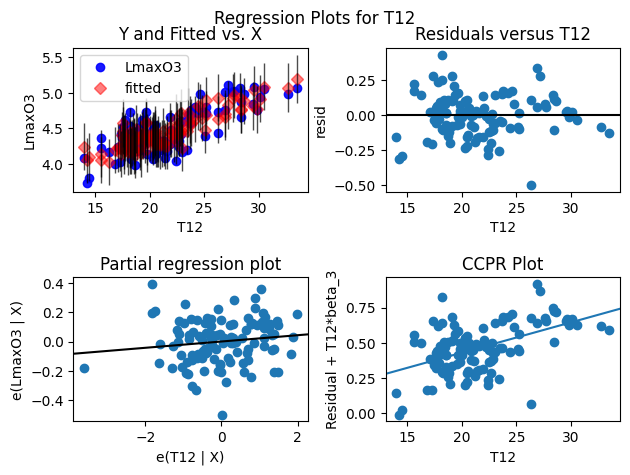

In [ ]:
# Variables explicatives du modèle complet
X_full = df[['maxO3v','T9','T12','T15','Ne9','Ne12','Ne15','Vx9','Vx12','Vx15']].copy()
y = df['LmaxO3']

# Suppression des lignes avec NaN
data_full = pd.concat([X_full, y], axis=1).dropna()
X_full_clean = data_full.drop(columns='LmaxO3')
y_clean = data_full['LmaxO3']

# Ajout constante pour statsmodels
X_full_const = sm.add_constant(X_full_clean)

# Régression
model_full = sm.OLS(y_clean, X_full_const).fit()
print(model_full.summary())

# Diagnostic graphique
sm.graphics.plot_regress_exog(model_full, 'T12')
plt.show()


* Le modèle est globalement significatif (F-stat significatif).

* Certaines variables ont des p-values > 0.05, donc non significatives (ex: Vx15, T9…).

* La multicolinéarité est probable (ex: T9, T12, T15 sont corrélées), ce qui fausse les tests de Student.

=> Il faut chercher un modèle plus parcimonieux.

**Qualité globale du modèle**
* R² = 0.738 : Environ 73.8 % de la variance de LmaxO3 est expliquée par le modèle. C’est bon dans un contexte environnemental.

* R² ajusté = 0.712 : Correction du R² prenant en compte le nombre de variables. Cela reste élevé → modèle raisonnablement explicatif.

* F-statistic = 28.42, p-value < 0.001 : Le modèle global est hautement significatif.

**Interprétation des coefficients**
* maxO3v: (coef= 0.0036	et p-value =0.000) ==>	Très significatif : plus le maximum d’ozone la veille est élevé, plus celui du lendemain tend à être élevé.
* T9, T12, T15:	(coeff =[-0.0014, 0.0215, 0.0055])	(p > 0.05) ==>	Non significatives. Même T12 n’est pas statistiquement fiable (p=0.174). Les températures seules ne suffisent pas à expliquer les variations d’ozone.

* Ne9: (coeff= -0.0252 et p-value = 0.016]) Significatif : plus la nébulosité à 9h est élevée, plus le niveau d’ozone est faible.

* Ne12, Ne15:	Non significatives ,ses mesures ne montrent pas d’effet clair sur l’ozone.

* Vx9, Vx12, Vx15: 	Tous non significatifs,	La composante Est-Ouest du vent n’a pas d’effet significatif dans ce modèle.

**Diagnostic graphique : plot_regress_exog(model, 'T12')**

* Ce graphique généré par statsmodels montre :

 - La relation entre T12 et LmaxO3.

 - Les résidus du modèle en fonction de T12.

 - L'influence potentielle de T12.

* Observation :

 - Le nuage de points est très dispersé autour de la ligne de régression.

 - Pas de pente nette → effet faible.

 - Les résidus semblent aléatoires, donc pas d'erreur structurelle, mais T12 n'est pas un bon prédicteur seul.

3. Sous-modèle (Stepwise)

                            OLS Regression Results                            
Dep. Variable:                 LmaxO3   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     74.54
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           4.69e-30
Time:                        14:32:38   Log-Likelihood:                 53.585
No. Observations:                 112   AIC:                            -97.17
Df Residuals:                     107   BIC:                            -83.58
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7216      0.121     30.868      0.0

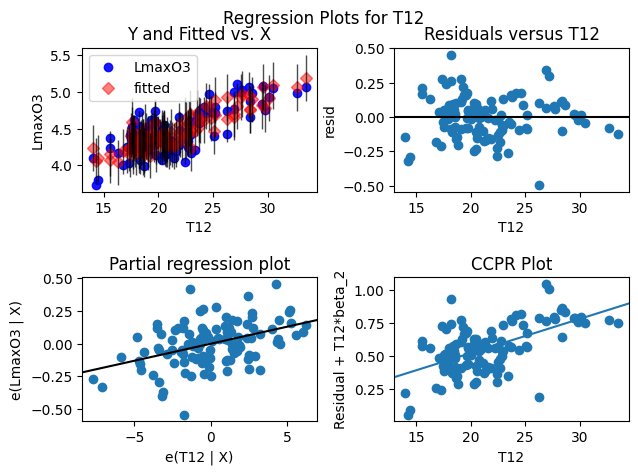

In [ ]:
# Sous-modèle avec les variables sélectionnées
X_sub = df[['maxO3v','T12','Ne9','Vx9']].copy()
data_sub = pd.concat([X_sub, y], axis=1).dropna()
X_sub_clean = data_sub.drop(columns='LmaxO3')
y_sub_clean = data_sub['LmaxO3']

X_sub_const = sm.add_constant(X_sub_clean)
model_sub = sm.OLS(y_sub_clean, X_sub_const).fit()
print(model_sub.summary())

# Diagnostics
sm.graphics.plot_regress_exog(model_sub, 'T12')
plt.show()

* Le modèle réduit a un R² légèrement plus faible, mais des coefficients plus significatifs.

* Moins de bruit, plus facile à interpréter.

* Peut-être un meilleur compromis biais/variance.

4. Meilleure prévision (Critère PRESS)

In [ ]:
# Fonction PRESS
def press(model):
    influence = model.get_influence()
    hat = influence.hat_matrix_diag
    res = model.resid
    press_stat = np.sum((res / (1 - hat))**2)
    return press_stat

# Modèle 1 = régression simple avec maxO3v seule
X_simple = sm.add_constant(df[['maxO3v']].dropna())
y_simple = df['LmaxO3'].loc[X_simple.index]
model_simple = sm.OLS(y_simple, X_simple).fit()

# Calcul des PRESS
press1 = press(model_simple)
press2 = press(model_full)
press3 = press(model_sub)

print(f"PRESS modèle simple : {press1:.2f}")
print(f"PRESS modèle complet : {press2:.2f}")
print(f"PRESS modèle réduit : {press3:.2f}")

PRESS modèle simple : 5.46
PRESS modèle complet : 3.11
PRESS modèle réduit : 2.77


Le PRESS (Predicted Residual Sum of Squares) est une mesure d’erreur de validation croisée leave-one-out :

PRESS=∑𝑖 =1..𝑛 [𝑒𝑖/(1−ℎ𝑖)]2
* ei : résidu du modèle pour l'observation
* hi : valeur diagonale de la matrice des leviers (hat matrix)

Cela revient à mesurer l'erreur de prédiction que le modèle aurait faite en excluant chaque observation tour à tour.

=>Plus le PRESS est faible, meilleure est la capacité prédictive du modèle.

**Interprétation**

* Modèle simple :

 - Déjà assez informatif : maxO3v explique bien LmaxO3 du lendemain.

 - Mais il reste des erreurs importantes (PRESS = 5.46).

* Modèle complet :

 - Ajout de toutes les variables améliore la prédiction (PRESS chute à 3.11).

 - Cependant, certaines variables sont non significatives (cf. résultats OLS précédents).

* Modèle réduit :

 - Encore meilleure performance (PRESS = 2.77).

 - Cela indique qu’une sélection intelligente de variables améliore la généralisation tout en réduisant le surapprentissage.